In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns

import plotlib as plib

## Load data

In [2]:
# Load data
pglsDir = '../../scripts/pgls_res/Me5/'

klist = ['Mammals', 'Birds']

modDict = {k: pd.read_csv(pglsDir + k + '.model_params.tsv', sep='\t')   for k in klist}

datDict = {k: pd.read_csv(pglsDir + k + '.xy_data.tsv', sep='\t')        for k in klist}

configTypes = {'xlog':bool}
configDict = {k: pd.read_csv('../../scripts/pgls_config_file.' + k + '.txt', sep='\t', index_col='x', dtype=configTypes, comment='#') for k in klist}

# Color data
cDat = pd.read_csv('../../data/plot_colors.tsv', sep='\t', index_col='Order')['Color']

## Plot figure 3

In [3]:
def makeLegendLab(clade, lam, pval, r2):
    outstr = '{}:\n'.format(clade) + r'$\lambda = {:0.2f}, p = {:0.3f}, r^2 = {:0.2f}$'.format(lam, pval, r2)
    return outstr

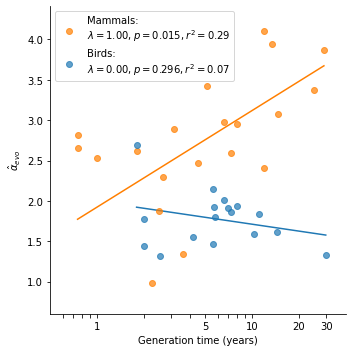

In [4]:
e = 'Generation_time_y'
fig, axs = plt.subplots(figsize=(5, 5))

# Iterate over groups
ptList, legList = [], []
for k in klist:
    ptDat = datDict[k].loc[datDict[k]['experiment'] == e + '.Alpha',].copy()
    xmin, xmax = min(ptDat.xvar) , max(ptDat.xvar)

    lnDat = modDict[k].loc[modDict[k]['experiment'] == e + '.Alpha',].squeeze()
    c = cDat[k]

    # Plot regression line
    plib.plot_line(lnDat.pgls_ml_intercept, lnDat.pgls_ml_slope, 
                   xmin = xmin, xmax = xmax, c = c, ax = axs)

    # Plot scatter
    ptList.append( axs.scatter('xvar', 'yvar', data=ptDat, c=c, edgecolors=c, alpha=0.7, zorder=10) )

    # Legend text
    legList.append(makeLegendLab(k, lnDat.ml_lambda, lnDat.pgls_ml_pval, lnDat.pgls_ml_rsq))

# Make log axis if needed
xticks = [0.6, 0.7, 0.8, 0.9, *range(1, 10), *range(10, 40, 10)]
xmaj = [1, 5, *range(10, 40, 10)]
xlab = plib.make_xtick_lab(xticks, xmaj)

axs.set_xlim((np.log10(0.5), np.log10(40)))
axs.set_xticks(np.log10(xticks))
axs.set_xticklabels(xlab)

axs.set_ylim((0.6, 4.41))

axs.legend(ptList, legList)

axs.set_xlabel('Generation time (years)')
axs.set_ylabel(r'$\hat{\alpha}_{evo}$')

sns.despine()

plt.tight_layout()
#fig.savefig('../pdfs/Figure_3.pdf')